# SPRINT 5

# Exercici 1

Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [3]:
import pandas as pd 
import numpy as np


df=pd.read_csv('liga_UEFA.csv', sep=';', encoding='latin-1')
df

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


W - Partidos ganados

D - Partidos empatados

L - Partidos perdidos

MP - Matches played

xG - the number of expected goals from one or several players, depend on the quality of the kicks.

xGA - the number of expected goals from opponents, depend on the quality of the kicks.

xG/90 the number of expected goals from one or several players in 90 minutes.

xGA/90 - the number of expected goals from opponents in 90 minutes.

xG/Sh - the average danger of the kick. To score it we should divide all xG on the number of goals from the team.

xGA/Sh - the average danger of the opponent kick. To score it we should divide all xG on the number of goals from the team.

xGD - the difference between expected scored and expected missed goals. xGD=xG-xGA.

GD-xGD - the luck of the team. (G-A) - (xG-xGA).

xG/xGA draw - one of the main indicators in the xG statistics. It shows the real power of the team. It scores by the division of the expected scored goals to the expected missed goals when the score is equal..

xG/xGA draw last 5 - the division of the expected scored goals to the expected missed goals when the score is equal for the five last matches.

## Pasos para realizar un Test de Hipótesis

### Paso 1:
    Definir la hipótesis nula e hipótesis alternativa
    H0: 

In [7]:
df.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,28.434134,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,49.500000,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,73.750000,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


In [4]:
audiencia=df['Attendance']
audiencia

0     52739
1     53367
2     40624
3     33176
4     41188
      ...  
93    22083
94     6705
95    20614
96    26826
97     7672
Name: Attendance, Length: 98, dtype: int64

In [8]:
media=round(audiencia.mean())
print('La media es:', media)

La media es: 24240


In [9]:
s=round(audiencia.std())
print('La desviación estándar es:', s)

La desviación estándar es: 14874


In [18]:
n=len(audiencia)
print('El n es:',n)

El n es: 98


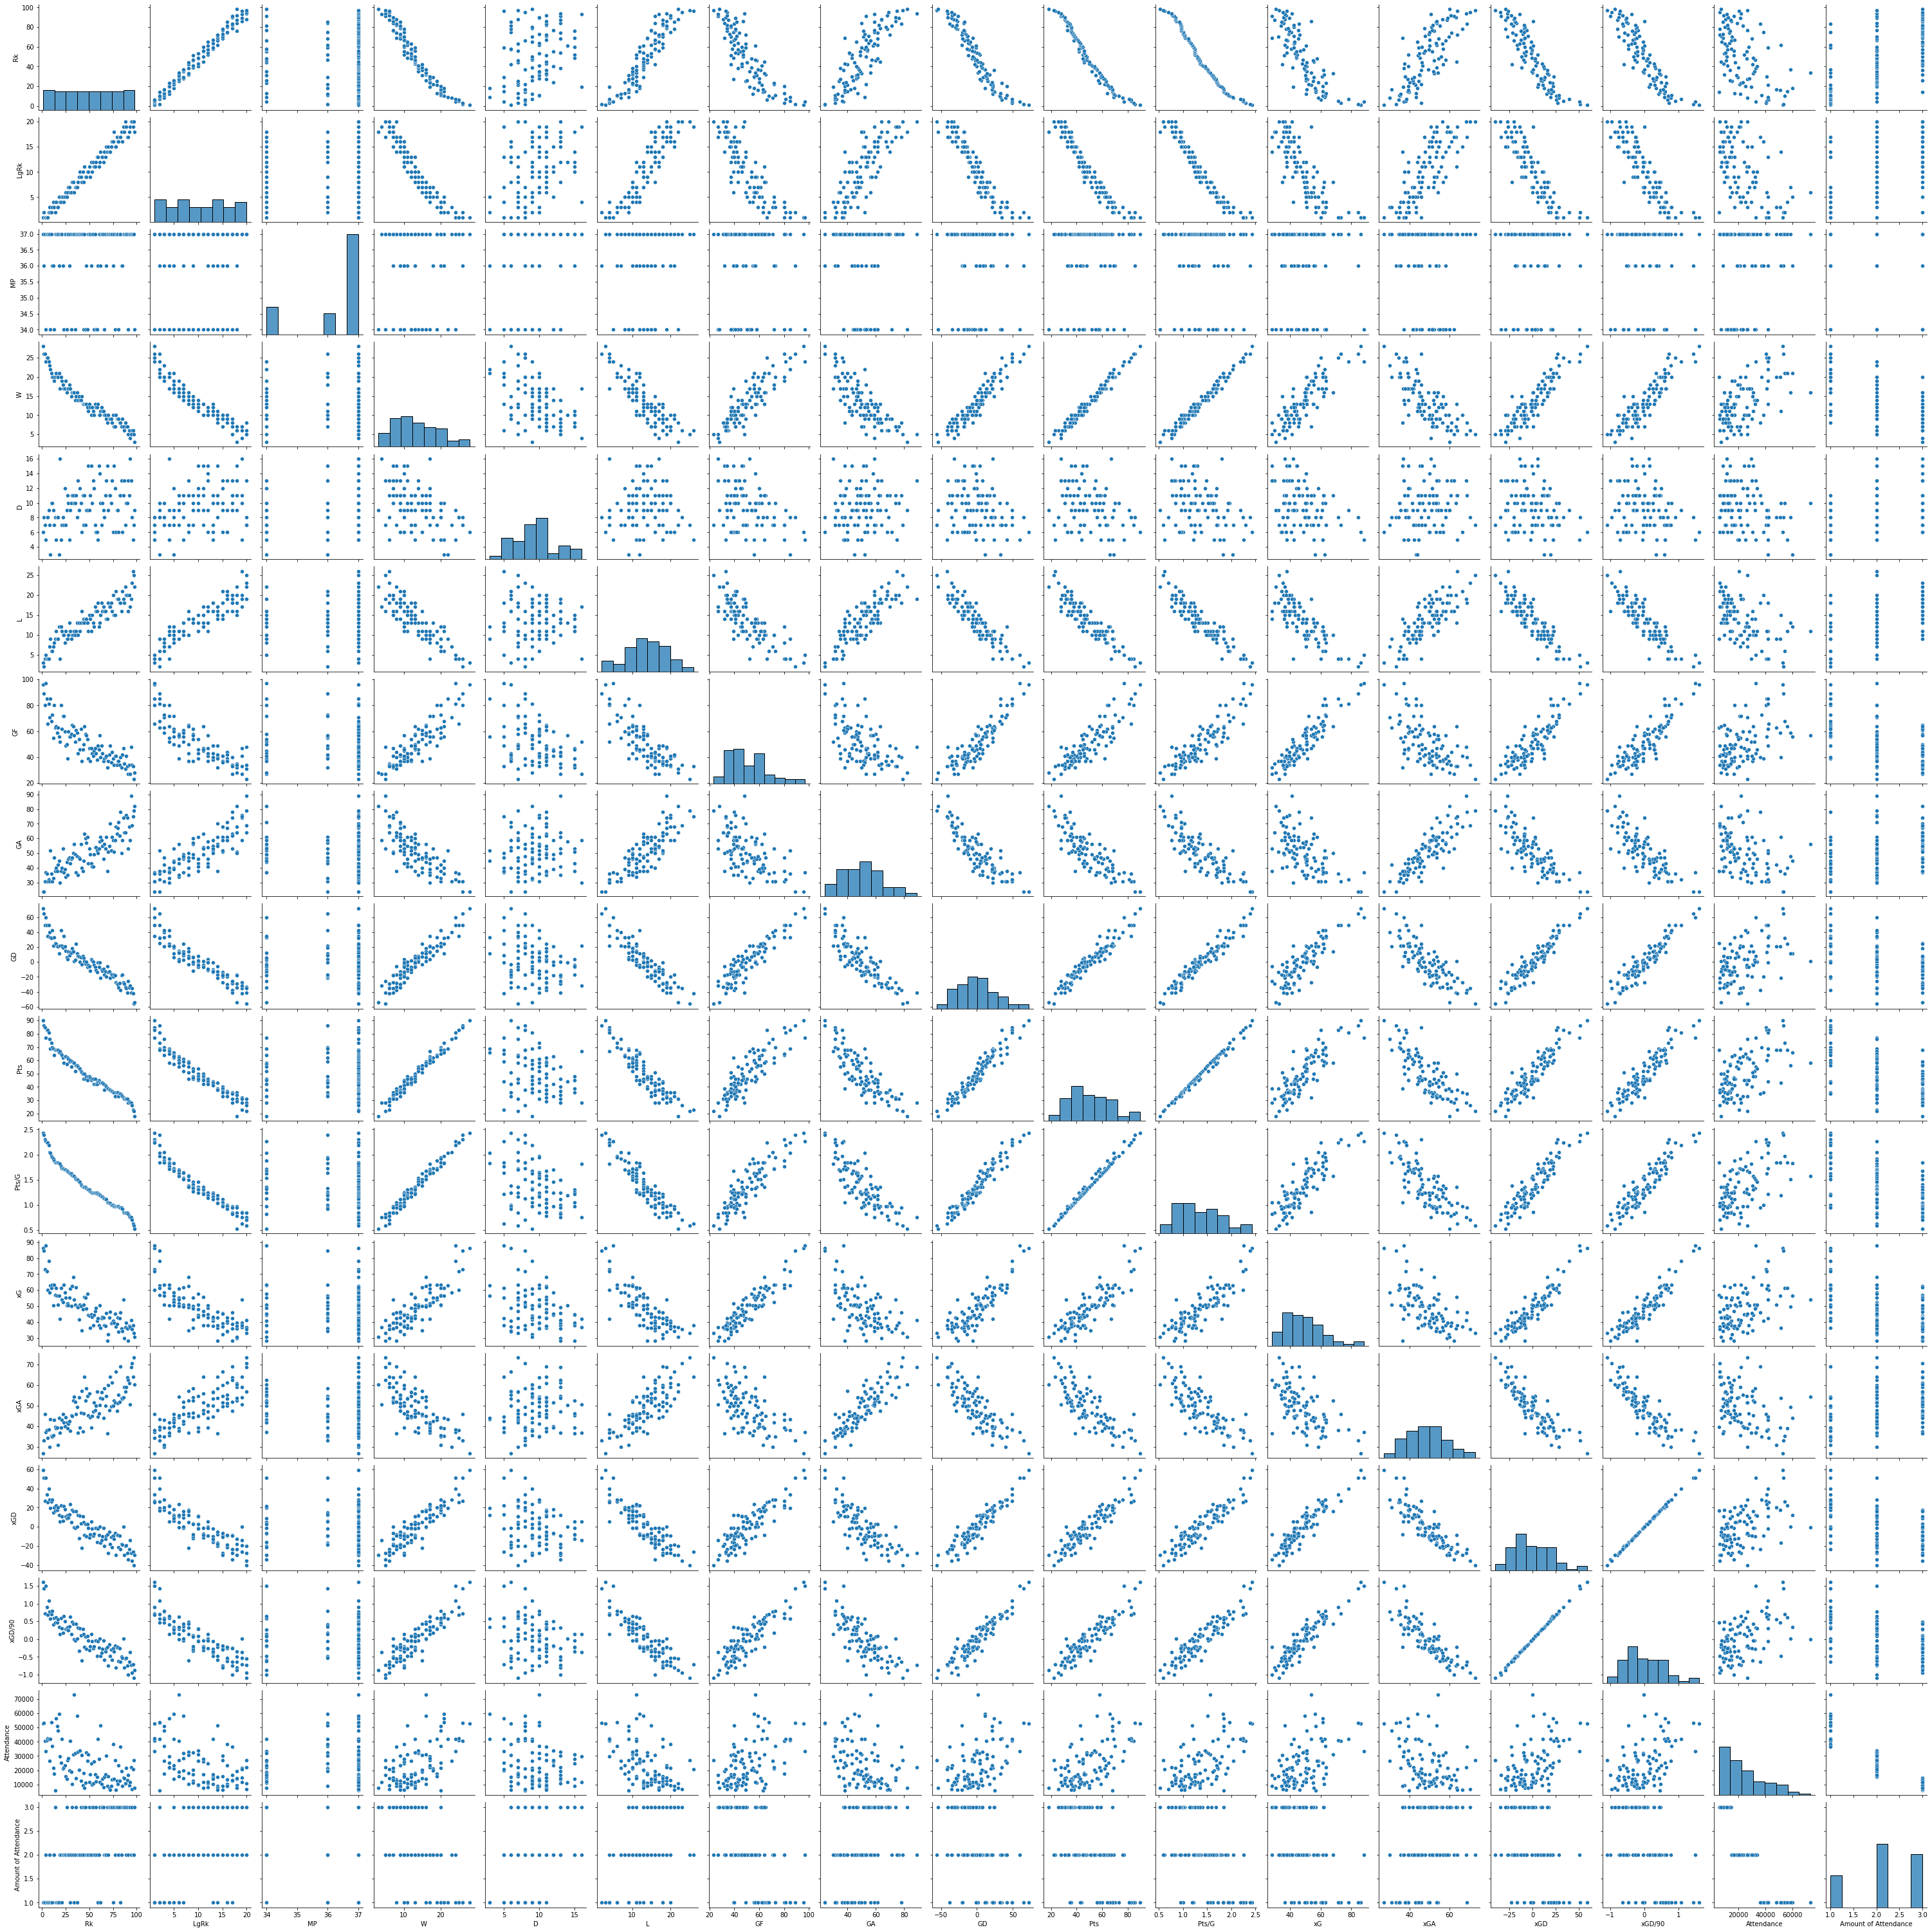

In [22]:
import seaborn as sns
sns.pairplot(df, diag_kind="hist")

In [24]:
df.isnull().sum()

Rk                      0
Squad                   0
Country                 0
LgRk                    0
MP                      0
W                       0
D                       0
L                       0
GF                      0
GA                      0
GD                      0
Pts                     0
Pts/G                   0
xG                      0
xGA                     0
xGD                     0
xGD/90                  0
Last 5                  0
Attendance              0
Top Team Scorer         0
Goalkeeper              0
Amount of Attendance    0
dtype: int64

In [26]:
df.isna().sum()

Rk                      0
Squad                   0
Country                 0
LgRk                    0
MP                      0
W                       0
D                       0
L                       0
GF                      0
GA                      0
GD                      0
Pts                     0
Pts/G                   0
xG                      0
xGA                     0
xGD                     0
xGD/90                  0
Last 5                  0
Attendance              0
Top Team Scorer         0
Goalkeeper              0
Amount of Attendance    0
dtype: int64

Según la Web Oficial de la UEFA:
"En total, los 32 partidos de la Champions League de las jornadas 1 y 2 congregaron a algo menos de 1,5 millones de espectadores (una media muy positiva de más de 45.700 por partido), lo que supone un aumento de más del 60% en comparación con las primeras noches de la campaña 2021/22 (poco más de 900.000)".

Por lo que tomaremos como media histórica de la liga: 40000 espectadores.

Fuente: https://es.uefa.com/uefachampionsleague/news/0245-0e9cd42076b3-e4f93602d0be-1000--nuevo-record-de-asistencia-de-la-champions-league/

### Paso 1: Determinar el H0 y H1

H0=40000 - La media de la audiencia es de 40000 asistentes al partido.

H1≠40000

In [11]:
import scipy.stats
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#calculamos el error estandar = desvio estandar / poblacion muestral

se=round(s/len(audiencia))
se
print('El error estandar es:',se)

El error estandar es: 152


In [ ]:
z=round((40000-media)/se)
print('El valor estadistico Z es:', z)

In [12]:
from scipy.stats import shapiro
stat, p = shapiro(audiencia)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablemente Gaussiana')
else:
    print('Probablemente no sea Gaussiana')

stat=0.907, p=0.000
Probablemente no sea Gaussiana


Conclusión: Se rechaza la hipótesis nula, por lo tanto no se puede rechazar la hipótesis alternativa. La muestra 'W' atribuida a los partidos ganados no tiene una distribución gaussiana.

In [ ]:
sns.kdeplot(audiencia)

##  Exercici 2


**Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.**

A partir de los valores de los puntos obtenidos durante la Liga y la cantidad de asistencia a su tribuna, buscaremos saber si se relaciona la cantidad de seguidores del equipo de fútbol con su exito dentro del torneo.

In [13]:
puntos_audiencia=df[['Pts', 'Attendance']].sort_values('Attendance', ascending=False )
puntos_audiencia

,Pts,Attendance
33,58,73150
17,66,59636
36,56,58370
14,68,56234
9,73,53933
...,...,...
70,38,7370
94,26,6705
77,36,6380
71,38,6320


Seleccionamos las dos columnas que son de nuestro interés: puntos obtenidos en el torneo y asistencia para ese equipo.
    

Realizaremos un **test de correlación de Pearson** con el fin de determinar si presentan una correlación lineal o no. 

Para poder utilizar Pearson, debemos tener las siguientes **condiciones**:

- La relación que se quiere estudiar es de tipo lineal (de lo contrario, el coeficiente de Pearson no la puede detectar).

- Las dos variables deben de ser numéricas.

- Normalidad: ambas variables se tienen que distribuir de forma normal. En la práctica, se suele considerar válido aun cuando se alejan moderadamente de la normalidad.

- Homocedasticidad: la varianza de  Y  debe ser constante a lo largo de la variable  X . Esto se puede contrastar si en un scatterplot los valores de  Y  mantienen la misma dispersión en las distintas zonas de la variable  X .

**Características**

- Toma valores entre [-1, +1], siendo +1 una correlación lineal positiva perfecta y -1 una correlación lineal negativa perfecta.

- Es independiente de las escalas en las que se midan las variables.

- No varía si se aplican transformaciones a las variables.

- No tiene en consideración que las variables sean dependientes o independientes.

- El coeficiente de correlación de Pearson no equivale a la pendiente de la recta de regresión.

- Es sensible a outliers, por lo que se recomienda, en caso de poder justificarlos, excluirlos antes de realizar el cálculo.

Planteamos nuestras hipótesis:

**H0** : Las muestras son independientes

**H1** : Existe una dependencia en las muestras

In [27]:
from scipy.stats import pearsonr, shapiro

# Verificación de normalidad de la variable Attendance
stat_att, p_att = shapiro(df.Attendance)
print('Attendance: stat=%.3f, p=%.3f' % (stat_att, p_att))
if p_att > 0.05:
    print('La variable Attendance parece ser Gaussiana')
else:
    print('La variable Attendance no parece ser Gaussiana')

# Verificación de normalidad de la variable Pts
stat_pts, p_pts = shapiro(df.Pts)
print('Pts: stat=%.3f, p=%.3f' % (stat_pts, p_pts))
if p_pts > 0.05:
    print('La variable Pts parece ser Gaussiana')
else:
    print('La variable Pts no parece ser Gaussiana')

# Aplicación de la correlación de Pearson si ambas variables son normales
if p_att > 0.05 and p_pts > 0.05:
    corr, p = pearsonr(df.Attendance, df.Pts)
    print('Correlación de Pearson: corr=%.3f, p=%.3f' % (corr, p))
    if p > 0.05:
        print('Probablemente independiente')
    else:
        print('Probablemente dependiente')
else:
    print('No se puede aplicar la correlación de Pearson ya que una o ambas variables no son normales')

Attendance: stat=0.907, p=0.000
La variable Attendance no parece ser Gaussiana
Pts: stat=0.972, p=0.035
La variable Pts no parece ser Gaussiana
No se puede aplicar la correlación de Pearson ya que una o ambas variables no son normales


En ninguno de los 2 casos el valor de P es mayor al nivel de significancia , por lo que podemos decir que no hay dependencia de las muestras. No hay suficiente evidencia para aceptar una relación.
No puedo aplicar shapiro.

## Exercici 3

Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [34]:
def nueva_columna(x):
    if x>=35000:
        mensaje=1
    elif x>=15000:
        mensaje=2
    else:
        mensaje=3
    return mensaje

df['AmountofAttendance'] = df['Attendance'].apply(nueva_columna)
df

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Amount of Attendance,AmountofAttendance
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson,1,1
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson,1,1
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois,1,1
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer,2,2
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil,2,2
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero,3,3
95,96,Watford,ENG,19,37,6,5,26,33,75,...,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster,2,2
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul,2,2


Ahora procedemos a realizar la correlación con la nueva columna creada: "Amount of Attendance".
Siendo de esta:
- 1: Alta cantidad de asistencias
- 2: Media cantidad de asistencias
- 3: Baja cantidad de asistencias

In [35]:
df.groupby(['AmountofAttendance'])['AmountofAttendance'].count()

AmountofAttendance
1    21
2    42
3    35
Name: AmountofAttendance, dtype: int64

E necesario comprobar si los datos siguen una distribución normal antes de aplicar la prueba de Shapiro-Wilk. Una forma común de hacer esto es mediante el uso de gráficos de distribución, como histogramas o gráficos Q-Q.

De esta forma, primero visualizamos la distribución de los datos mediante un histograma y un gráfico Q-Q. Si los datos siguen una distribución normal, deberían formar una línea recta en el gráfico Q-Q. Posteriormente, aplicamos la prueba de Shapiro-Wilk para comprobar la normalidad de los datos y decidir si podemos aplicar el coeficiente de correlación de Pearson o no.

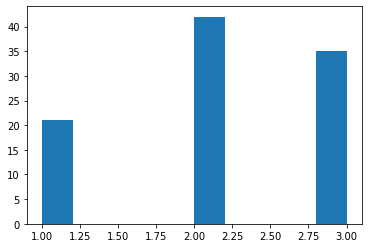

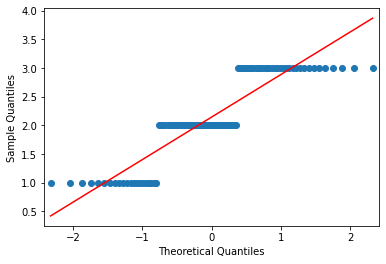

In [38]:
# Histograma
plt.hist(df.AmountofAttendance, bins=10)
plt.show()

# Gráfico Q-Q
import statsmodels.api as sm
import pylab

sm.qqplot(df.AmountofAttendance, line='s')
pylab.show()


Aplicamos correlación de pearson

In [37]:
from scipy.stats import f_oneway
stat, p = pearsonr(df.AmountofAttendance , df.Pts)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independiente')
else:
	print('Probablemente dependiente')

stat=-0.567, p=0.000
Probablemente dependiente
